<a href="https://colab.research.google.com/github/arghads9177/association-rule-groceries/blob/master/association_rule_groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis on Groceries

## About Dataset

The purpose of this data science project is to perform a market basket analysins on a purchase records of a grocery.

Market basket analysis is a data mining technique used by retailers to increase sales by better understanding of customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

## Details of data

The dataset has **38765** rows of the purchase orders of people from the grocery stores. These orders can be analysed and association rules can be generated using Market Basket Analysis by algorithms like **Apriori** Algorithm.

## Data Dictionary

* **Member_number**

    * Numerical
    * It is a unique identifier for each customer.

  * **Date**

    * Date
    * It is date of purchase made by a customer.

  * **itemDescription**
    * Categorical
    * It is the description of product purchased by the customers.


## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* This will answer the questions like:

    * Which items are frequently bought together?
    * If a user buys an item X, which item is he/she likely to buy next?

### Load Libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules

sns.set_style("darkgrid")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load Dataset and Get What it Contains

In [3]:
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
file_path = os.path.join(folder_path, "Groceries_dataset.csv")
df = pd.read_csv(file_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Get top 5 rows
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
# Get number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 38765
Number of columns: 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [6]:
# Get column informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Number of unique values in each columns
for col in df.columns:
  print(f"Number of unique values in {col} column: {df[col].nunique()}\n")

Number of unique values in Member_number column: 3898

Number of unique values in Date column: 728

Number of unique values in itemDescription column: 167



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Check number of times each item sold
df["itemDescription"].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription
whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: count, Length: 167, dtype: int64

#### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [9]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
dtype: int64

### Observations

* No null value present in any columns

### Market Basket Analysis

Market Basket Analysis stands as a crucial technique employed by major retailers to unveil connections among products. This method involves searching for combinations of items that frequently appear together in customer transactions. In simpler terms, it empowers retailers to pinpoint correlations between the items purchased by customers.

Association Rules are widely used to analyze retail basket or transaction data and are intended to identify strong patterns discovered in transaction data.

#### Create Busket of items

In [10]:
# Get the number of times each item purchased by each customer
basket = df.groupby(["Member_number", "itemDescription"])["Date"].count().unstack().fillna(0)
basket

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# A function to encode number of purchase to 0 and 1 which is required to apply on apriori algorithm.
def encode_units(x):
  if x < 1:
    return 0
  if x >= 1:
    return 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Apply the encoding for each item in the basket
basket = basket.applymap(encode_units)
basket.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Association Rule Mining

Association rule mining is a process that deploys pattern recognition to identify and quantify relationship between different, yet related items.

A simple association rules use case -

Eggs and Bread are frequently purchased together. With this finding, you can increase sales by:

* Placing eggs and bread next to each other so that when a customer buys one of the products, they don't have to walk to buy the other product
* Advertising to buyer of either eggs or bread in order to increase that person's propensity to purchase the (paired) other product.
* Offer discounts on both eggs and bread if the customer buys both of them in one purchase.

**Association Rule**: "if item eggs are purchased,then the possibility of buying bread is __"

Can also be represented as:

* {eggs} -> {bread}

#### Advantages :

* Relatively fast method
* Works well on small quantities of data
* Few(if any) feature engineering requirement

#### Three Ways to Measure Association :
* Support
* Confidence
* Lift


In [23]:
def associated_item_rules(support, threshold):
  # Applying apriori algorithm on item df
  frequent_items = apriori(basket, min_support= support, use_colnames= True)

  # Storing the association rules for the item
  rules = association_rules(frequent_items, metric= 'lift', min_threshold= threshold)

  # Sort the rules on lift and support
  rules = rules.sort_values(["lift", "support"], ascending= False).reset_index(drop= True)

  return frequent_items, rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Which items are frequently bought together?

In [14]:
def get_unique_pairs(data):
  unique_pairs = set()
  for line in data:
    item1, item2 = line.split(",")
    # Create a tuple to represent the ordered pair
    pair = (item1, item2)
    # Add the reversed pair as well for considering order (e.g., "a,b" and "b,a" are different)
    reversed_pair = (item2, item1)
    unique_pairs.add(min(pair, reversed_pair))  # Add the lexicographically smaller pair
  return list(unique_pairs)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
items, rules = associated_item_rules(0.15, 1)
items = []
for i in range(0, len(rules)):
  antecedents = list(rules.iloc[i]["antecedents"])
  consequents = list(rules.iloc[i]["consequents"])
  item = ",".join(antecedents + consequents)
  items.append(item)
# Remove duplicate in the list
unique_items = get_unique_pairs(items)
print("=" * 60)
print("Frequently bought together items:")
print("=" * 60)
for item in unique_items:
  print(f"{item} \n")

Frequently bought together items:
('other vegetables', 'whole milk') 

('soda', 'whole milk') 

('rolls/buns', 'whole milk') 

('whole milk', 'yogurt') 



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


### If a user buys an item X, which item is he/she likely to buy next?

In [26]:
def associated_items(item):
  items, rules = associated_item_rules(0.15, 1)

  # Find the rules where ancedents contain the specified item and lift of the rule is more than 1
  featured_rules = rules[(rules["lift"] > 1) & (rules["antecedents"].apply(lambda x: item in x))]
  return featured_rules[["antecedents", "consequents"]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
associated_items("whole milk")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents
1,(whole milk),(yogurt)
2,(whole milk),(rolls/buns)
4,(whole milk),(other vegetables)
7,(whole milk),(soda)


In [28]:
associated_items("rolls/buns")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents
3,(rolls/buns),(whole milk)


### Frequent Itemsets Visualization

> Visualize the support of different itemsets to identify most popular itemssets

In [29]:
frequent_items, rules = associated_item_rules(0.15, 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [30]:
# Set length of each itemsets
frequent_items["length"] = frequent_items["itemsets"].apply(lambda x: len(x))

# Get frequent itemsets having length equalto or more than 2
frequent_items_2 = frequent_items[frequent_items["length"] >= 2].sort_values("support", ascending= False).reset_index(drop= True).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Support')

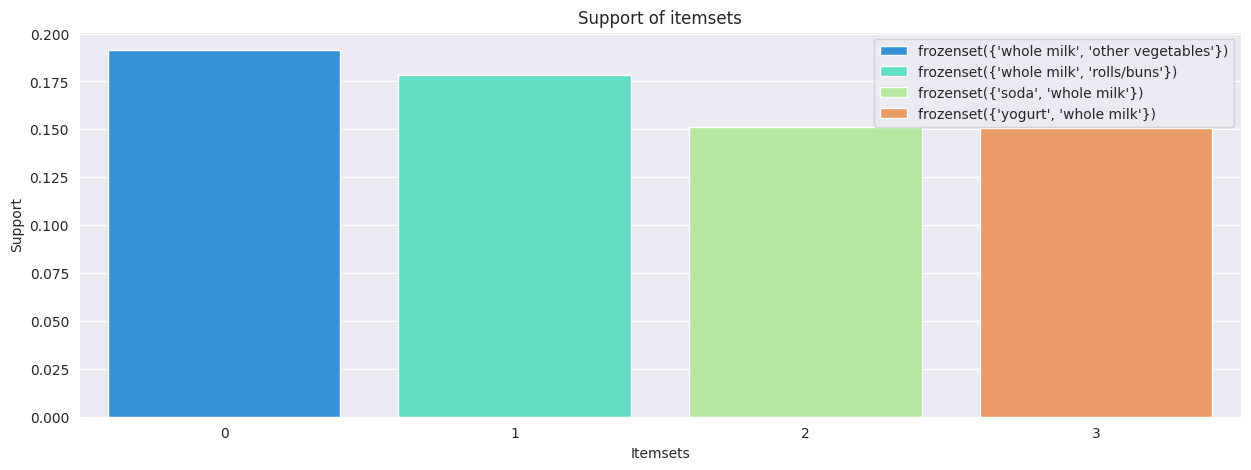

In [31]:
# Plot Bar graph

plt.figure(figsize=(15, 5))
sns.barplot(x= range(len(frequent_items_2)),
            y= frequent_items_2["support"],
            hue = [str(i) for i in frequent_items_2["itemsets"]],
            palette= "rainbow")
plt.title("Support of itemsets")
plt.xlabel("Itemsets")
plt.ylabel("Support")

### Observations

* Whole milk and other vagitables are mostly purchased together.
* Whole milk are purchased with many items like roll/buns, soda and yogurt.

## Association Rules Visualization

> To visualize the relationship between support and confidence of the rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Support vs Confidence')

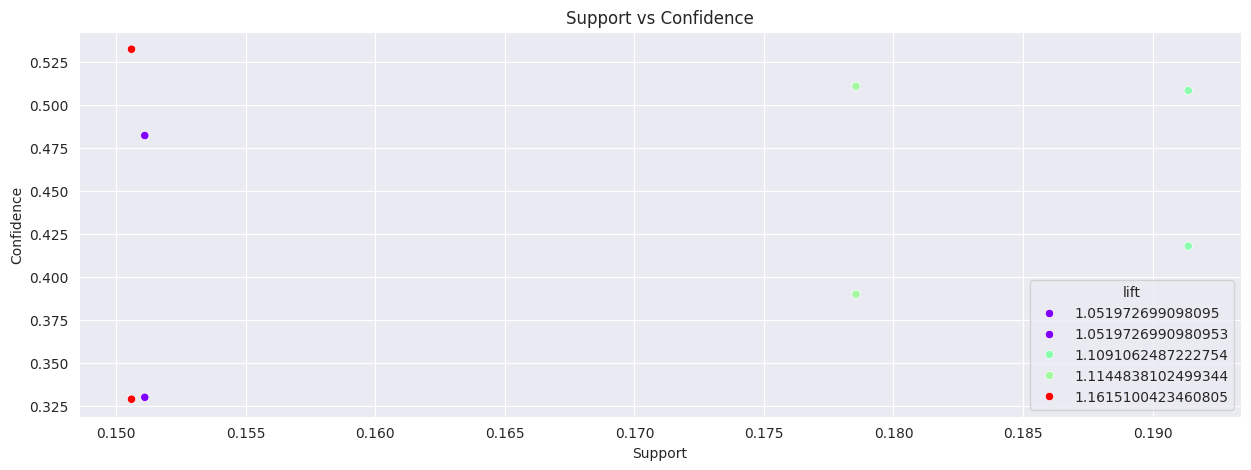

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= rules["support"], y= rules["confidence"], sizes=rules["lift"], hue= rules["lift"], palette="rainbow")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence")

### Observations

* No significant pattern present in Support and Confidence of metrics of rules.

### Observations

* No significant pattern present in Support and Confidence of metrics of rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Network Graph of Association Rules')

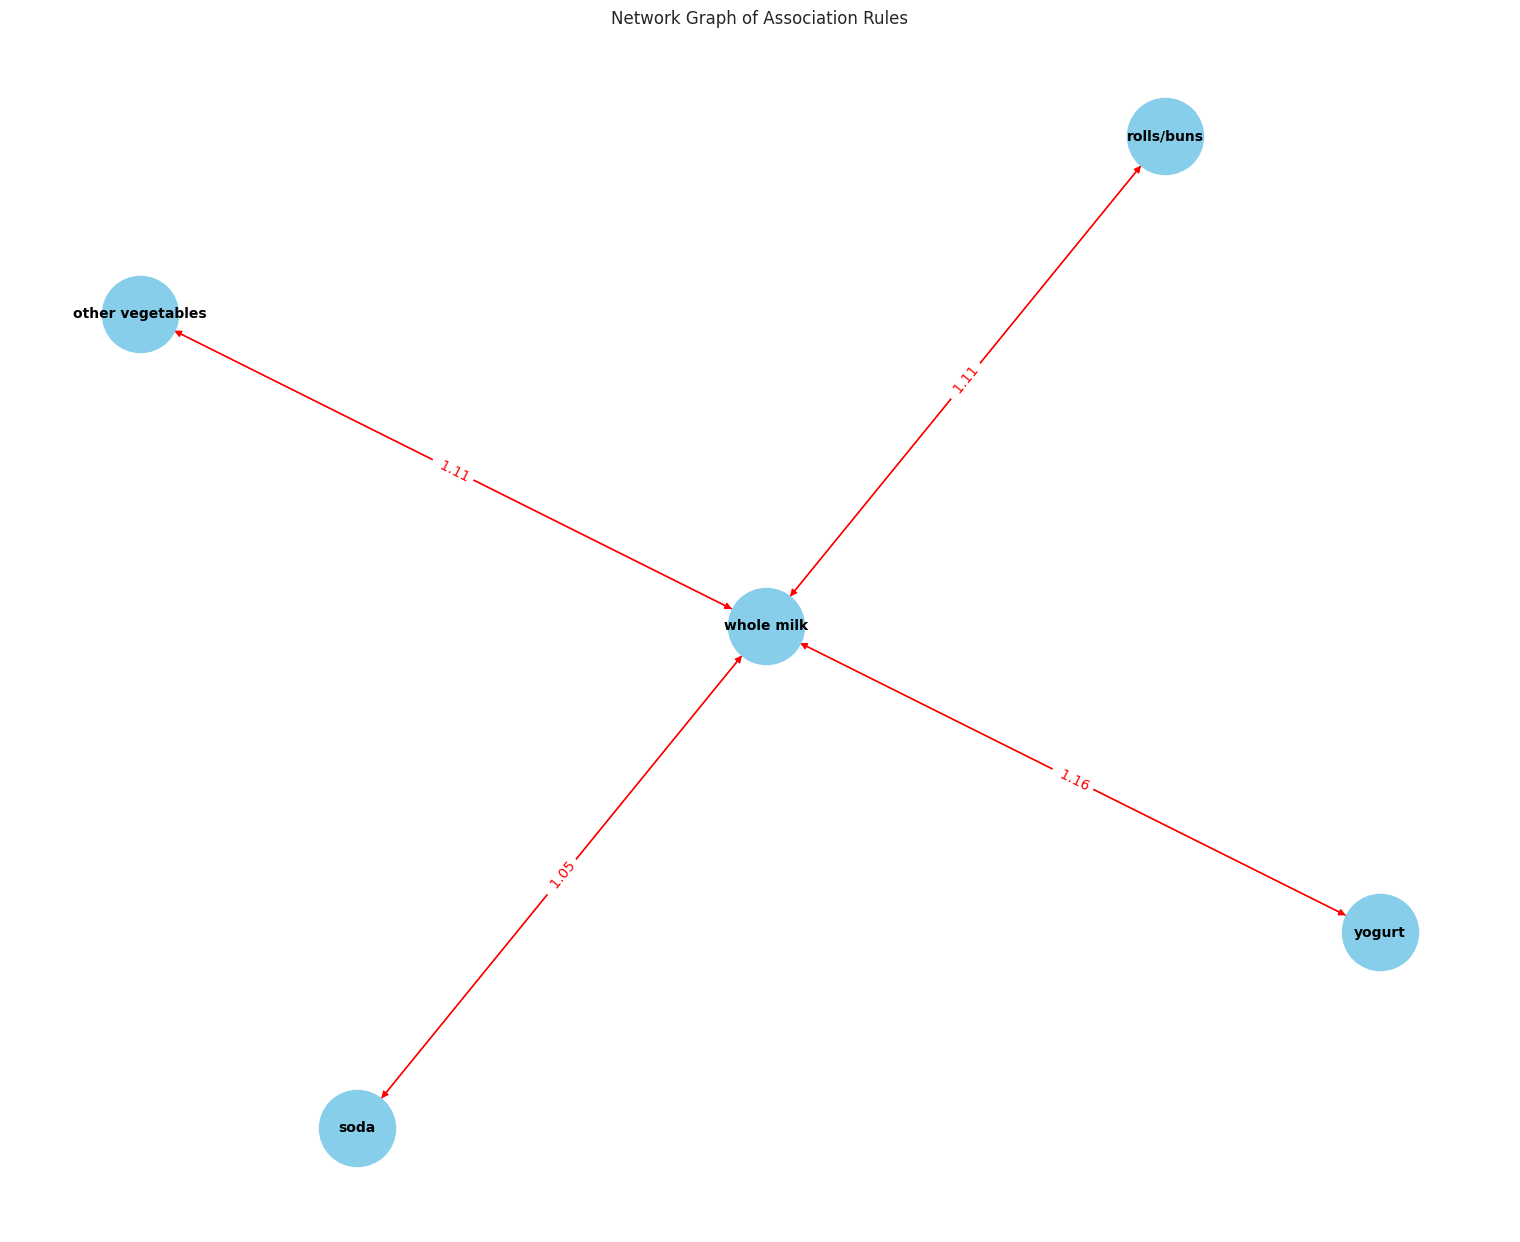

In [33]:
# Create a network graph object
G = nx.DiGraph()

# Add nodes and edges from rules
for _, rule in rules.iterrows():
  for antecedent in rule["antecedents"]:
    for consequent in rule["consequents"]:
      G.add_edge(antecedent, consequent, weight= rule["lift"])

# Draw the network plot
plt.figure(figsize=(15,12))
pos = nx.spring_layout(G, k= 1)
nx.draw(G, pos, with_labels= True, node_size= 3000, node_color= "skyblue", font_size= 10, font_weight= "bold", edge_color= "red")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels= {(u, v): f'{d["weight"]: .2f}' for u, v, d in G.edges(data= True)}, font_color= "red")
plt.title("Network Graph of Association Rules")

### Observations

* There are strong association present for **whole milk** with other items.
* soda, other vagitablesyogurt and roll/bun don't have strog association rule.